# Simple Deep Artificial Neural Network (ANN) - Case Study - Tensorflow 2.0.0
---
Author: Bhaveshkumar Thaker

---

## Import Libraries

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 380.8MB 75kB/s 
     |████████████████████████████████| 3.8MB 44.2MB/s 
     |████████████████████████████████| 450kB 44.9MB/s 
ERROR: tensorflow 1.15.0rc3 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.0 which is incompatible.
ERROR: tensorflow 1.15.0rc3 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons

import tensorflow as tf

In [3]:
print(tf.version.VERSION)
print('GPU is', 'available' if tf.config.experimental.list_physical_devices('GPU') else 'NOT AVAILABLE')

2.0.0
GPU is available


In [4]:
seed = 321

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

%matplotlib inline

plt.figure(figsize = (14, 11))
plt.style.use('bmh')

colors = mcolors.TABLEAU_COLORS
sns.set(rc={'figure.figsize' : (14, 11), 'figure.facecolor': 'whitesmoke', 'axes.facecolor': 'whitesmoke', 'grid.color': 'slategrey'})
sns.color_palette(palette = list(colors.values()));

<Figure size 1008x792 with 0 Axes>

## Common Methods

In [0]:
def plot_sample_data(X, y) :
    plt.plot(X[y == 0, 0], X[y == 0, 1], 'o', alpha = 0.7)
    plt.plot(X[y == 1, 0], X[y == 1, 1], 's', alpha = 0.7)
    plt.plot(X[y == 2, 0], X[y == 2, 1], '^', alpha = 0.7)
    plt.plot(X[y == 2, 0], X[y == 2, 1], 'd', alpha = 0.7)
    plt.legend(['0', '1', '2', '3'])
    plt.show();
    return plt

In [0]:
def plot_decision_boundry(model, X, y) :
    amin, bmin = X.min(axis = 0) - 0.1
    amax, bmax = X.max(axis = 0) + 0.1
    
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    plt.contourf(aa, bb, Z, cmap="PiYG", alpha = 0.5) #coolwarm, PiYG
    plot_sample_data(X, y)
    
    return plt

## Generate random BLOB(s) input data to train on

In [0]:
X, y = make_blobs(n_samples=1000, centers=2)

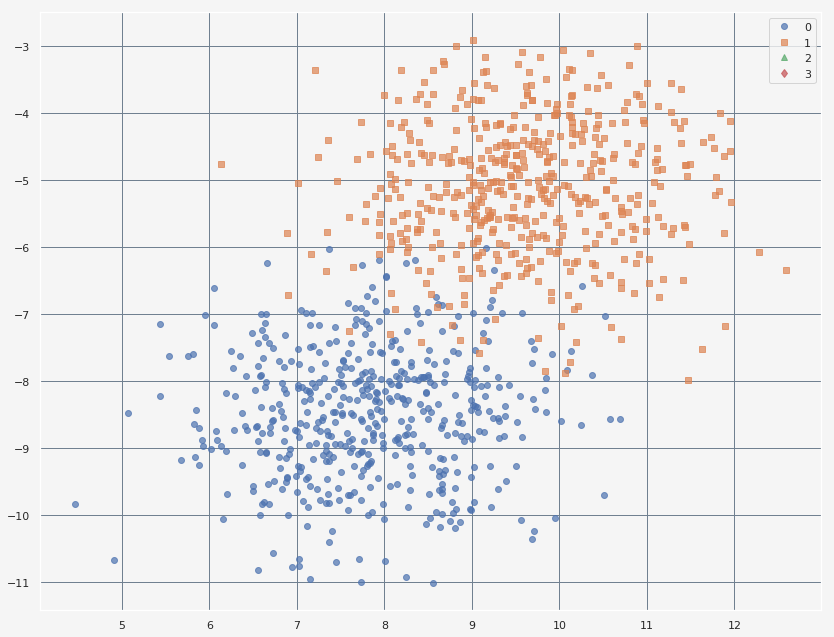

In [8]:
plot_sample_data(X, y);

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((700, 2), (300, 2), (700,), (300,))

In [10]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='sigmoid',
                                                   #kernel_initializer = tf.random_uniform_initializer(-0.1, 0.1),
                                                   #bias_initializer = tf.random_uniform_initializer(-0.1, 0.1),
                                                   )
                             ]
                            )
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [11]:
my_callbacks = []

history = model.fit(X_train, y_train, epochs = 150, validation_data=(X_test, y_test), callbacks=my_callbacks)

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 [==============================] - 2s 2ms/sample - loss: 0.8583 - accuracy: 0.5629 - val_loss: 0.7547 - val_accuracy: 0.6033
Epoch 2/150
700/700 [==============================] - 0s 152us/sample - loss: 0.7256 - accuracy: 0.5986 - val_loss: 0.6375 - val_accuracy: 0.6400
Epoch 3/150
700/700 [==============================] - 0s 151us/sample - loss: 0.6108 - accuracy: 0.6429 - val_loss: 0.5367 - val_accuracy: 0.7033
Epoch 4/150
700/700 [==============================] - 0s 151us/sample - loss: 0.5143 - accuracy: 0.6971 - val_loss: 0.4538 - val_accuracy: 0.7567
Epoch 5/150
700/700 [==============================] - 0s 167us/sample - loss: 0.4347 - accuracy: 0.7514 - val_loss: 0.3882 - val_accuracy: 0.8033
Epoch 6/150
700/700 [==============================] - 0s 162us/sample - loss: 0.3718 - accuracy: 0.8029 - val_loss: 0.3362 - val_accuracy: 0.8333
Epoch 7/150
700/700 [==============================] - 0s 167us/sample - l

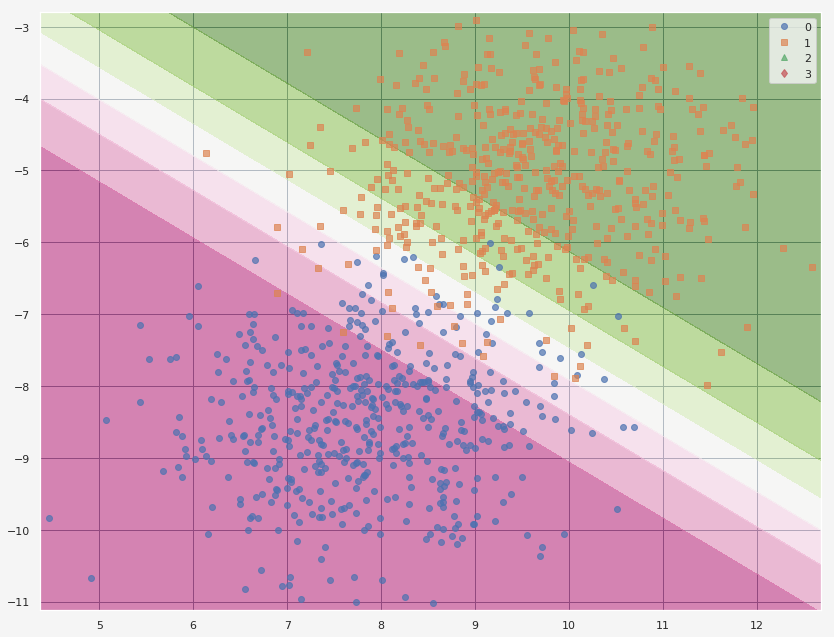

In [12]:
plot_decision_boundry(model, X, y);

In [13]:
model = tf.keras.Sequential([tf.keras.layers.Dense(12, input_shape=(input_size,), activation='tanh',),
                             tf.keras.layers.Dense(8, input_shape=(input_size,), activation='tanh',),
                             tf.keras.layers.Dense(4, input_shape=(input_size,), activation='tanh',),
                             tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='sigmoid',),
                            ]
                           )
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [14]:
my_callbacks = []

history = model.fit(X_train, y_train, epochs = 150, validation_data=(X_test, y_test), callbacks=my_callbacks)

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 [==============================] - 1s 1ms/sample - loss: 0.6577 - accuracy: 0.5314 - val_loss: 0.5923 - val_accuracy: 0.7400
Epoch 2/150
700/700 [==============================] - 0s 207us/sample - loss: 0.5429 - accuracy: 0.9214 - val_loss: 0.4785 - val_accuracy: 0.9600
Epoch 3/150
700/700 [==============================] - 0s 198us/sample - loss: 0.4309 - accuracy: 0.9614 - val_loss: 0.3752 - val_accuracy: 0.9500
Epoch 4/150
700/700 [==============================] - 0s 192us/sample - loss: 0.3344 - accuracy: 0.9671 - val_loss: 0.2981 - val_accuracy: 0.9467
Epoch 5/150
700/700 [==============================] - 0s 186us/sample - loss: 0.2637 - accuracy: 0.9671 - val_loss: 0.2438 - val_accuracy: 0.9533
Epoch 6/150
700/700 [==============================] - 0s 183us/sample - loss: 0.2148 - accuracy: 0.9700 - val_loss: 0.2095 - val_accuracy: 0.9500
Epoch 7/150
700/700 [==============================] - 0s 183us/sample - l

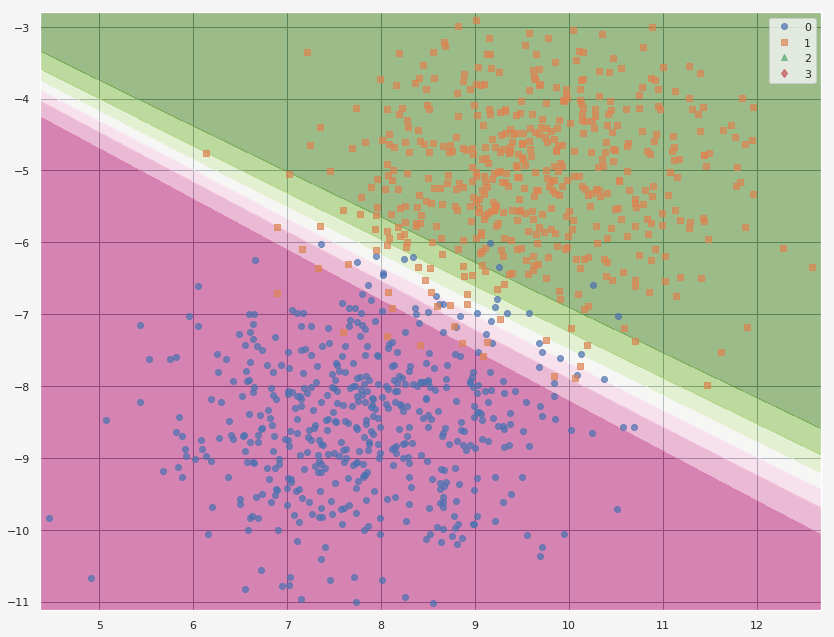

In [15]:
plot_decision_boundry(model, X, y);

## Generate random MOON(s) input data to train on

In [0]:
X, y = make_moons(n_samples=1000, noise=0.1)

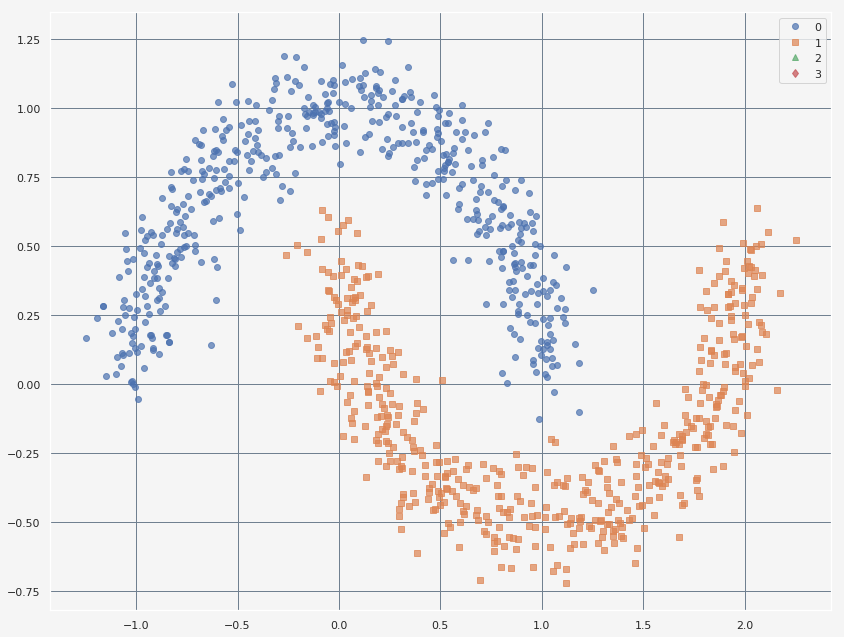

In [17]:
plot_sample_data(X, y);

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((700, 2), (300, 2), (700,), (300,))

In [19]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='sigmoid'),
                   ]
                  )
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
             )
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [20]:
my_callbacks=[]
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=my_callbacks, verbose=2)

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 - 1s - loss: 1.0905 - accuracy: 0.2600 - val_loss: 1.1126 - val_accuracy: 0.2167
Epoch 2/150
700/700 - 0s - loss: 1.0748 - accuracy: 0.2643 - val_loss: 1.0970 - val_accuracy: 0.2167
Epoch 3/150
700/700 - 0s - loss: 1.0596 - accuracy: 0.2657 - val_loss: 1.0814 - val_accuracy: 0.2133
Epoch 4/150
700/700 - 0s - loss: 1.0447 - accuracy: 0.2657 - val_loss: 1.0661 - val_accuracy: 0.2167
Epoch 5/150
700/700 - 0s - loss: 1.0300 - accuracy: 0.2671 - val_loss: 1.0513 - val_accuracy: 0.2200
Epoch 6/150
700/700 - 0s - loss: 1.0159 - accuracy: 0.2686 - val_loss: 1.0364 - val_accuracy: 0.2267
Epoch 7/150
700/700 - 0s - loss: 1.0017 - accuracy: 0.2743 - val_loss: 1.0219 - val_accuracy: 0.2267
Epoch 8/150
700/700 - 0s - loss: 0.9879 - accuracy: 0.2743 - val_loss: 1.0076 - val_accuracy: 0.2333
Epoch 9/150
700/700 - 0s - loss: 0.9743 - accuracy: 0.2757 - val_loss: 0.9936 - val_accuracy: 0.2467
Epoch 10/150
700/700 - 0s - loss: 0.9611 - ac

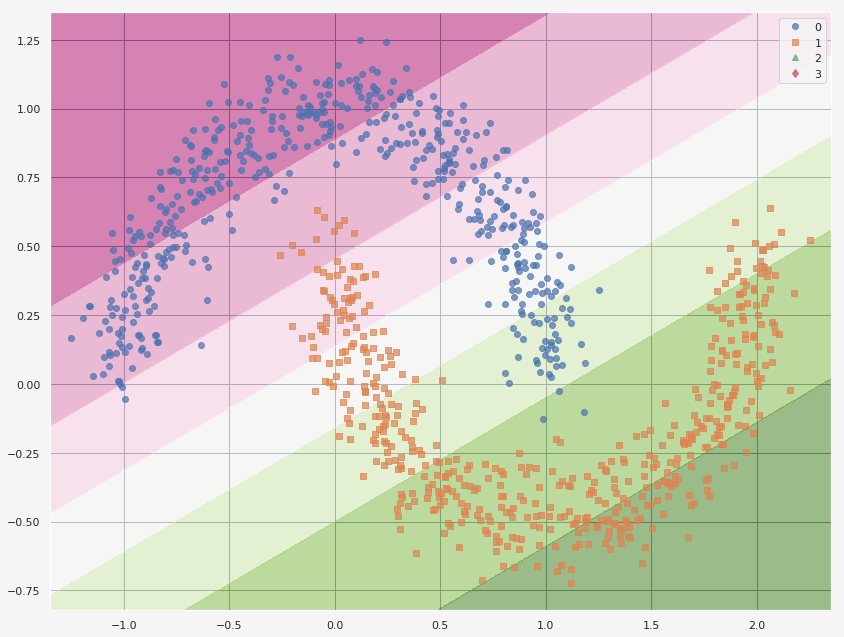

In [21]:
plot_decision_boundry(model, X, y);

In [22]:
model = tf.keras.Sequential([tf.keras.layers.Dense(12, input_shape=(input_size,), activation='tanh'),
                             tf.keras.layers.Dense(8, input_shape=(input_size,), activation='tanh'),
                             tf.keras.layers.Dense(4, input_shape=(input_size,), activation='tanh'),
                             tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='sigmoid'),
                   ]
                  )
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
             )
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [23]:
my_callbacks=[]
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=my_callbacks, verbose=2)

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 - 1s - loss: 0.7194 - accuracy: 0.4014 - val_loss: 0.6802 - val_accuracy: 0.6233
Epoch 2/150
700/700 - 0s - loss: 0.6543 - accuracy: 0.8029 - val_loss: 0.6229 - val_accuracy: 0.8800
Epoch 3/150
700/700 - 0s - loss: 0.6109 - accuracy: 0.8071 - val_loss: 0.5815 - val_accuracy: 0.8533
Epoch 4/150
700/700 - 0s - loss: 0.5785 - accuracy: 0.7957 - val_loss: 0.5460 - val_accuracy: 0.8600
Epoch 5/150
700/700 - 0s - loss: 0.5487 - accuracy: 0.8029 - val_loss: 0.5106 - val_accuracy: 0.8700
Epoch 6/150
700/700 - 0s - loss: 0.5178 - accuracy: 0.8129 - val_loss: 0.4743 - val_accuracy: 0.8800
Epoch 7/150
700/700 - 0s - loss: 0.4861 - accuracy: 0.8300 - val_loss: 0.4363 - val_accuracy: 0.8900
Epoch 8/150
700/700 - 0s - loss: 0.4536 - accuracy: 0.8386 - val_loss: 0.3990 - val_accuracy: 0.8900
Epoch 9/150
700/700 - 0s - loss: 0.4225 - accuracy: 0.8471 - val_loss: 0.3645 - val_accuracy: 0.9033
Epoch 10/150
700/700 - 0s - loss: 0.3951 - ac

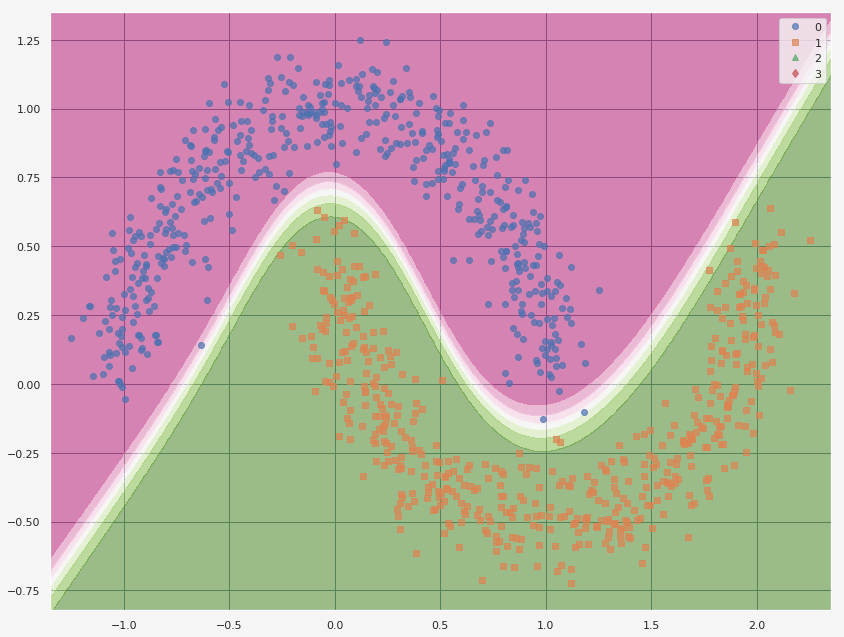

In [24]:
plot_decision_boundry(model, X, y);

## Generate random CIRCLE(s) input data to train on

In [0]:
X, y = make_circles(n_samples=1000, noise=0.1, factor=0.5)

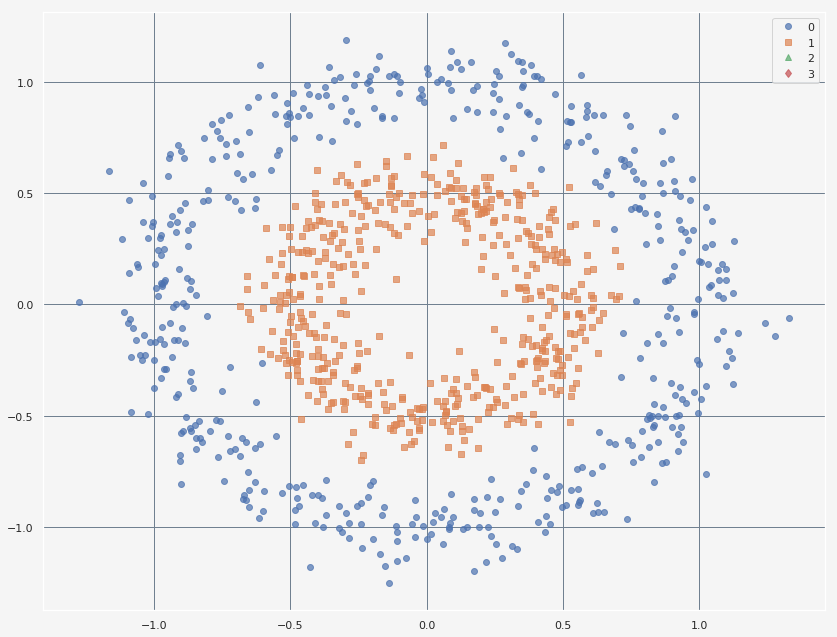

In [26]:
plot_sample_data(X, y);

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

((700, 2), (300, 2), (700,), (300,))

In [28]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='sigmoid'),
                   ]
                  )
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
             )
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [29]:
my_callbacks = []

history = model.fit(X_train, y_train, epochs = 150, validation_data=(X_test, y_test), callbacks=my_callbacks)

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 [==============================] - 1s 844us/sample - loss: 0.7982 - accuracy: 0.5000 - val_loss: 0.8562 - val_accuracy: 0.4833
Epoch 2/150
700/700 [==============================] - 0s 189us/sample - loss: 0.7951 - accuracy: 0.5000 - val_loss: 0.8523 - val_accuracy: 0.4833
Epoch 3/150
700/700 [==============================] - 0s 170us/sample - loss: 0.7921 - accuracy: 0.5043 - val_loss: 0.8487 - val_accuracy: 0.4833
Epoch 4/150
700/700 [==============================] - 0s 165us/sample - loss: 0.7893 - accuracy: 0.5043 - val_loss: 0.8449 - val_accuracy: 0.4833
Epoch 5/150
700/700 [==============================] - 0s 175us/sample - loss: 0.7865 - accuracy: 0.5043 - val_loss: 0.8415 - val_accuracy: 0.4833
Epoch 6/150
700/700 [==============================] - 0s 181us/sample - loss: 0.7839 - accuracy: 0.5043 - val_loss: 0.8378 - val_accuracy: 0.4867
Epoch 7/150
700/700 [==============================] - 0s 192us/sample -

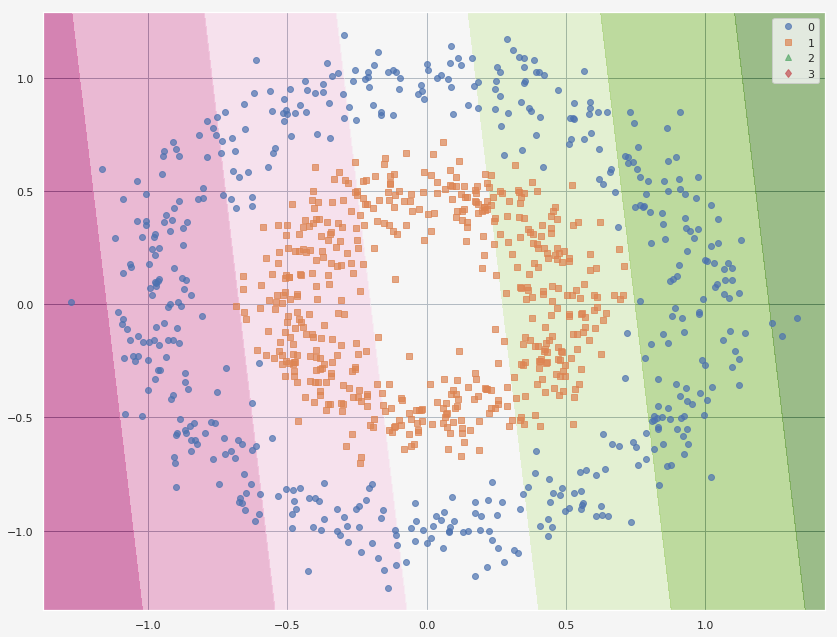

In [30]:
plot_decision_boundry(model, X, y);

In [31]:
model = tf.keras.Sequential([tf.keras.layers.Dense(12, input_shape=(input_size,), activation='tanh'),
                             tf.keras.layers.Dense(8, input_shape=(input_size,), activation='tanh'),
                             tf.keras.layers.Dense(4, input_shape=(input_size,), activation='tanh'),
                             tf.keras.layers.Dense(output_size, input_shape=(input_size,), activation='sigmoid'),
                   ]
                  )
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
             )
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 12)                36        
_________________________________________________________________
dense_12 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_13 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 5         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [32]:
my_callbacks=[]
history = model.fit(X_train, y_train, epochs=150, validation_data=(X_test, y_test), callbacks=my_callbacks, verbose=2)

Train on 700 samples, validate on 300 samples
Epoch 1/150
700/700 - 1s - loss: 0.7200 - accuracy: 0.5000 - val_loss: 0.7154 - val_accuracy: 0.5300
Epoch 2/150
700/700 - 0s - loss: 0.6930 - accuracy: 0.5543 - val_loss: 0.7001 - val_accuracy: 0.5700
Epoch 3/150
700/700 - 0s - loss: 0.6836 - accuracy: 0.6014 - val_loss: 0.6964 - val_accuracy: 0.5567
Epoch 4/150
700/700 - 0s - loss: 0.6784 - accuracy: 0.5657 - val_loss: 0.6919 - val_accuracy: 0.5400
Epoch 5/150
700/700 - 0s - loss: 0.6746 - accuracy: 0.5600 - val_loss: 0.6897 - val_accuracy: 0.5133
Epoch 6/150
700/700 - 0s - loss: 0.6715 - accuracy: 0.5657 - val_loss: 0.6865 - val_accuracy: 0.5167
Epoch 7/150
700/700 - 0s - loss: 0.6669 - accuracy: 0.5800 - val_loss: 0.6818 - val_accuracy: 0.5600
Epoch 8/150
700/700 - 0s - loss: 0.6617 - accuracy: 0.6100 - val_loss: 0.6776 - val_accuracy: 0.5533
Epoch 9/150
700/700 - 0s - loss: 0.6574 - accuracy: 0.6229 - val_loss: 0.6752 - val_accuracy: 0.5867
Epoch 10/150
700/700 - 0s - loss: 0.6513 - ac

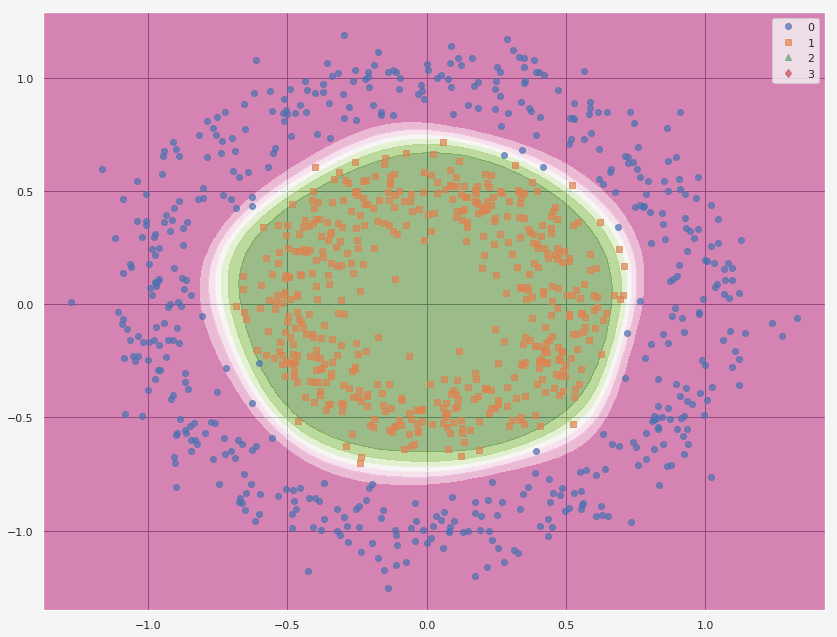

In [33]:
plot_decision_boundry(model, X, y);